In [1]:
import numpy as np
import torch
import pandas as pd
import json
from torch.nn.functional import cosine_similarity
from glob import glob
cosine = lambda *args: cosine_similarity(*args, dim=0).item()
from scipy.spatial.distance import cosine, pdist, squareform
import seaborn
import matplotlib.pyplot as plt

In [10]:
whisper_embeds_path = '../data/whisper_embeds/whisper_embeds.pt'
tira_embed_path = '../data/whisper_embeds/tira-asr-orig-test.pt'
tira_embed_1k = '../data/whisper_embeds/tira-1k-hf-train.pt'
tira_embed_1k_concat = '../data/whisper_embeds/tira-concat-1k-hf-train.pt'
commonvoice_embeds_path = '/Users/markjos/projects/malachor5/data/commonvoice/'

In [5]:
fleurs_embeds = torch.load(whisper_embeds_path)
# clean up keys
fleurs_embeds={k.split('-')[1]: v for k,v in fleurs_embeds.items()}
fleurs_embeds.keys()

dict_keys(['it_it', 'lt_lt', 'hu_hu', 'nb_no', 'fr_fr', 'tr_tr', 'ln_cd', 'az_az', 'uz_uz', 'kk_kz', 'ar_eg', 'km_kh', 'el_gr', 'te_in', 'sw_ke', 'hi_in', 'sk_sk', 'mk_mk', 'sn_zw', 'fi_fi', 'mr_in', 'ca_es', 'fa_ir', 'as_in', 'hy_am', 'ro_ro', 'lb_lu', 'mn_mn', 'oc_fr', 'bg_bg', 'et_ee', 'vi_vn', 'sd_in', 'ur_pk', 'ps_af', 'es_419', 'ne_np', 'lv_lv', 'bn_in', 'tg_tj', 'ka_ge', 'ru_ru', 'mt_mt', 'uk_ua', 'lo_la', 'mi_nz', 'hr_hr', 'ja_jp', 'is_is', 'yo_ng', 'ta_in', 'sr_rs', 'sv_se', 'jv_id', 'pt_br', 'da_dk', 'ko_kr', 'sl_si', 'af_za', 'th_th', 'ml_in', 'ha_ng', 'bs_ba', 'so_so', 'cy_gb', 'he_il', 'pl_pl', 'nl_nl', 'gl_es', 'ms_my', 'be_by', 'am_et', 'de_de', 'en_us', 'id_id', 'gu_in', 'kn_in', 'cs_cz', 'pa_in', 'asr'])

In [6]:
commonvoice_embeds_files = glob(commonvoice_embeds_path+'*.pt')
commonvoice_embeds_files

['/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-en-train.pt',
 '/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-ar-train.pt',
 '/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-tr-train.pt',
 '/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-vi-train.pt',
 '/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-id-train.pt',
 '/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-fr-train.pt',
 '/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-ja-train.pt',
 '/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-de-train.pt',
 '/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-sv-SE-train.pt',
 '/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-ru-train.pt',
 '/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-hi-train.pt',
 '/Users/markjos/projects/malachor5/data/commonvoice/common_vo

In [7]:
commonvoice_embeds={embed_file.split('-')[-2]: torch.load(embed_file) for embed_file in commonvoice_embeds_files}
commonvoice_embeds.keys()

dict_keys(['en', 'ar', 'tr', 'vi', 'id', 'fr', 'ja', 'de', 'SE', 'ru', 'hi', 'nl', 'es', 'fi', 'pl', 'yo', 'it', 'ko', 'ca', 'pt'])

In [12]:
tira_embeds = torch.load(tira_embed_1k)
tira_embeds_concat = torch.load(tira_embed_1k_concat)
tira_embeds.shape, tira_embeds_concat.shape

(torch.Size([1280]), torch.Size([1280]))

In [13]:
lang_code_path = '../meta/language_codes.json'
with open(lang_code_path) as f:
    lang_code_dict = json.load(f)
lang_code_dict

[{'iso2': 'en',
  'iso3': 'eng',
  'whisper': 'english',
  'fleurs': 'en_us',
  'fleurs_script': 'Latn',
  'commonvoice_code': 'en',
  'commonvoice_name': 'English'},
 {'iso2': 'de',
  'iso3': 'deu',
  'whisper': 'german',
  'fleurs': 'de_de',
  'fleurs_script': 'Latn',
  'commonvoice_code': 'de',
  'commonvoice_name': 'German'},
 {'iso2': 'es',
  'iso3': 'spa',
  'whisper': 'spanish',
  'fleurs': 'es_419',
  'fleurs_script': 'Latn',
  'commonvoice_code': 'es',
  'commonvoice_name': 'Spanish'},
 {'iso2': 'ru',
  'iso3': 'rus',
  'whisper': 'russian',
  'fleurs': 'ru_ru',
  'fleurs_script': 'Cyrl',
  'commonvoice_code': 'ru',
  'commonvoice_name': 'Russian'},
 {'iso2': 'ko',
  'iso3': 'kor',
  'whisper': 'korean',
  'fleurs': 'ko_kr',
  'fleurs_script': 'Hang',
  'commonvoice_code': 'ko',
  'commonvoice_name': 'Korean'},
 {'iso2': 'fr',
  'iso3': 'fra',
  'whisper': 'french',
  'fleurs': 'fr_fr',
  'fleurs_script': 'Latn',
  'commonvoice_code': 'fr',
  'commonvoice_name': 'French'},
 {'

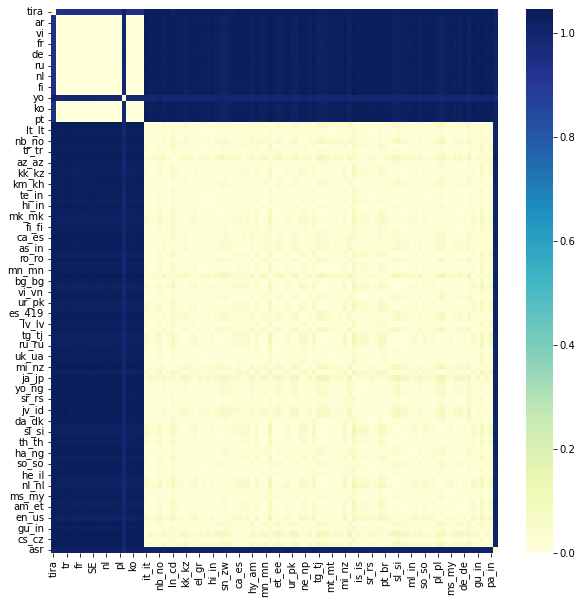

In [24]:
def dist_matrix(embeds_dict):
    embeds_tensor=torch.stack([t for t in embeds_dict.values()])
    dist_mat=squareform(pdist(embeds_tensor,cosine))
    dist_mat.shape
    dist_df=pd.DataFrame(dist_mat, index=embeds_dict.keys(), columns=embeds_dict.keys())
    fig, ax = plt.subplots(figsize=(10,10))
    seaborn.heatmap(dist_df, cmap='YlGnBu')
dist_matrix({'tira':tira_embeds, **commonvoice_embeds, **fleurs_embeds})